# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

# College Enrollment Predicator
Keyword: linear regression, machine learning

# Description

University Enrollment and Graduation Rate Prediction Using Multiple Linear Regression

In this project, we will train regression models to find the probability of the enrollment rate and the graduation rate of university. In this project we will go through the following tasks: 
(1) Understand the Problem Statement
(2) Import libraries and datasets 
(3) Perform Exploratory Data Analysis
(4) Perform Data Visualization
(5) Create Training and Testing Datasets
(6) Train and Evaluate a Linear Regression Model
(7) Train and Evaluate an Artificial Neural Network Model
(8) Train and Evaluate a Random Forest Regressor and Decision Tree Model

# Source
https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset

# Objective

Apply Python libraries to import and visualize dataset.

Perform exploratory data analysis

Understand the distribution and relationship of data

Split and Standardize training and testing dataset

Train various regression models using Scikit-Learn

Train Artificial Neural Network models to perform regression tasks

Evaluate, compare and analyze the performance of different regression models

# Explore DataSet

# TASK #2: IMPORT LIBRARIES AND DATASET

In [1]:
!pip install tensorflow

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Create Excel filepath
data = pd.read_csv("resources/IPEDS_data.csv")
data.head()

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN


In [3]:
#List all column names in dataset
for col in data.columns:
    print (col)

ID number
Name
year
ZIP code
Highest degree offered
County name
Longitude location of institution
Latitude location of institution
Religious affiliation
Offers Less than one year certificate
Offers One but less than two years certificate
Offers Associate's degree
Offers Two but less than 4 years certificate
Offers Bachelor's degree
Offers Postbaccalaureate certificate
Offers Master's degree
Offers Post-master's certificate
Offers Doctor's degree - research/scholarship
Offers Doctor's degree - professional practice
Offers Doctor's degree - other
Offers Other degree
Applicants total
Admissions total
Enrolled total
Percent of freshmen submitting SAT scores
Percent of freshmen submitting ACT scores
SAT Critical Reading 25th percentile score
SAT Critical Reading 75th percentile score
SAT Math 25th percentile score
SAT Math 75th percentile score
SAT Writing 25th percentile score
SAT Writing 75th percentile score
ACT Composite 25th percentile score
ACT Composite 75th percentile score
Estimate

In [4]:
data.isnull().sum()

ID number                                                   0
Name                                                        0
year                                                        0
ZIP code                                                    0
Highest degree offered                                      0
                                                         ... 
Percent of freshmen receiving student loan aid             42
Percent of freshmen receiving federal student loans        42
Percent of freshmen receiving other loan aid               42
Endowment assets (year end) per FTE enrollment (GASB)    1018
Endowment assets (year end) per FTE enrollment (FASB)     574
Length: 145, dtype: int64

In [5]:
#Statistical summary of the dataframe
data.describe()

,ID number,year,Longitude location of institution,Latitude location of institution,Applicants total,Admissions total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,SAT Critical Reading 25th percentile score,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
count,1534.000000,1534.0,1534.000000,1534.000000,1377.000000,1377.000000,1377.000000,1257.000000,1259.000000,1169.000000,...,1492.00000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,1492.000000,516.000000,9.600000e+02
mean,189091.037810,2013.0,-88.342338,38.729993,6391.193174,3554.880174,1043.046478,53.927605,53.085782,470.340462,...,41.47185,40.764075,15.418901,35.384718,70.335121,64.959786,64.180295,7.553619,9459.463178,6.503032e+04
std,58641.915456,0.0,14.838804,4.832832,8787.469171,4309.457606,1285.165519,34.385164,31.658662,68.368390,...,18.88068,18.560557,14.091423,21.897744,29.463324,19.143070,19.337354,7.706674,19398.443224,1.773784e+05
min,100654.000000,2013.0,-158.062444,19.701854,0.000000,0.000000,0.000000,0.000000,0.000000,310.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.000000,4.200000e+01
25%,153148.500000,2013.0,-94.576342,35.348340,1488.000000,950.000000,287.000000,16.000000,26.000000,430.000000,...,28.00000,27.000000,6.000000,18.000000,48.000000,54.000000,53.000000,2.000000,2080.000000,8.391000e+03
50%,186508.000000,2013.0,-84.514218,39.946096,3350.000000,2056.000000,538.000000,65.000000,49.000000,460.000000,...,40.00000,39.000000,12.000000,34.000000,78.000000,68.000000,67.000000,6.000000,4283.000000,1.870400e+04
75%,215730.000000,2013.0,-77.207136,41.984929,7016.000000,4203.000000,1246.000000,86.000000,87.000000,500.000000,...,51.25000,51.000000,20.250000,50.000000,98.000000,79.000000,78.000000,11.000000,8715.500000,4.505250e+04
max,456490.000000,2013.0,-67.456534,64.857053,72676.000000,35815.000000,10241.000000,100.000000,100.000000,720.000000,...,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,83.000000,213079.000000,2.505435e+06


# Trimming The Data
Since we have so many attributes and not all are relevant we need to select the ones we want to use. We can do this by typing the following.

In [7]:
scores = pd.DataFrame(data, columns = [
"SAT Critical Reading 25th percentile score",
"SAT Critical Reading 75th percentile score",
"SAT Math 25th percentile score",
"SAT Math 75th percentile score",
"SAT Writing 25th percentile score",
"SAT Writing 75th percentile score",
"ACT Composite 25th percentile score",
"ACT Composite 75th percentile score",                                  
"Total  enrollment"])
scores =scores.dropna()
scores.head()

,SAT Critical Reading 25th percentile score,SAT Critical Reading 75th percentile score,SAT Math 25th percentile score,SAT Math 75th percentile score,SAT Writing 25th percentile score,SAT Writing 75th percentile score,ACT Composite 25th percentile score,ACT Composite 75th percentile score,Total enrollment
5,490.0,620.0,500.0,640.0,480.0,600.0,22.0,30.0,34752.0
8,520.0,620.0,540.0,650.0,510.0,620.0,24.0,30.0,24864.0
14,550.0,640.0,500.0,600.0,530.0,610.0,19.0,24.0,347.0
18,495.0,613.0,465.0,550.0,440.0,580.0,20.0,26.0,3062.0
21,500.0,630.0,510.0,610.0,500.0,610.0,23.0,28.0,4833.0


In [8]:
admit = pd.DataFrame(data, columns = ["Applicants total",
"Admissions total",
"Total  enrollment"])
admit.dropna()

,Applicants total,Admissions total,Total enrollment
0,6142.0,5521.0,5020.0
1,5689.0,4934.0,18568.0
3,2054.0,1656.0,7376.0
4,10245.0,5251.0,6075.0
5,30975.0,17515.0,34752.0
...,...,...,...
1516,1611.0,960.0,988.0
1525,3195.0,1406.0,4660.0
1529,393.0,136.0,1877.0
1530,3033.0,2158.0,516.0


In [9]:
race = pd.DataFrame(data, columns = [
'Percent of total enrollment that are American Indian or Alaska Native',
'Percent of total enrollment that are Asian',
'Percent of total enrollment that are Black or African American',
'Percent of total enrollment that are Hispanic/Latino',
'Percent of total enrollment that are Native Hawaiian or Other Pacific Islander',
'Percent of total enrollment that are White',
'Percent of total enrollment that are two or more races',
'Percent of total enrollment that are Race/ethnicity unknown',
'Percent of total enrollment that are Nonresident Alien',
'Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander',
'Percent of total enrollment that are women',
"Total  enrollment"])
race.dropna()
race.head()

,Percent of total enrollment that are American Indian or Alaska Native,Percent of total enrollment that are Asian,Percent of total enrollment that are Black or African American,Percent of total enrollment that are Hispanic/Latino,Percent of total enrollment that are Native Hawaiian or Other Pacific Islander,Percent of total enrollment that are White,Percent of total enrollment that are two or more races,Percent of total enrollment that are Race/ethnicity unknown,Percent of total enrollment that are Nonresident Alien,Percent of total enrollment that are Asian/Native Hawaiian/Pacific Islander,Percent of total enrollment that are women,Total enrollment
0,0.0,1.0,92.0,1.0,0.0,5.0,0.0,1.0,0.0,1.0,55.0,5020.0
1,0.0,5.0,21.0,3.0,0.0,64.0,3.0,1.0,3.0,5.0,61.0,18568.0
2,0.0,0.0,40.0,1.0,0.0,30.0,0.0,28.0,0.0,0.0,58.0,631.0
3,1.0,4.0,12.0,3.0,0.0,69.0,1.0,3.0,6.0,4.0,44.0,7376.0
4,0.0,0.0,91.0,1.0,0.0,3.0,1.0,1.0,2.0,0.0,61.0,6075.0


# TASK #4: PERFORM DATA VISUALIZATION

array([[<AxesSubplot:title={'center':'SAT Critical Reading 25th percentile score'}>,
        <AxesSubplot:title={'center':'SAT Critical Reading 75th percentile score'}>,
        <AxesSubplot:title={'center':'SAT Math 25th percentile score'}>],
       [<AxesSubplot:title={'center':'SAT Math 75th percentile score'}>,
        <AxesSubplot:title={'center':'SAT Writing 25th percentile score'}>,
        <AxesSubplot:title={'center':'SAT Writing 75th percentile score'}>],
       [<AxesSubplot:title={'center':'ACT Composite 25th percentile score'}>,
        <AxesSubplot:title={'center':'ACT Composite 75th percentile score'}>,
        <AxesSubplot:title={'center':'Total  enrollment'}>]], dtype=object)

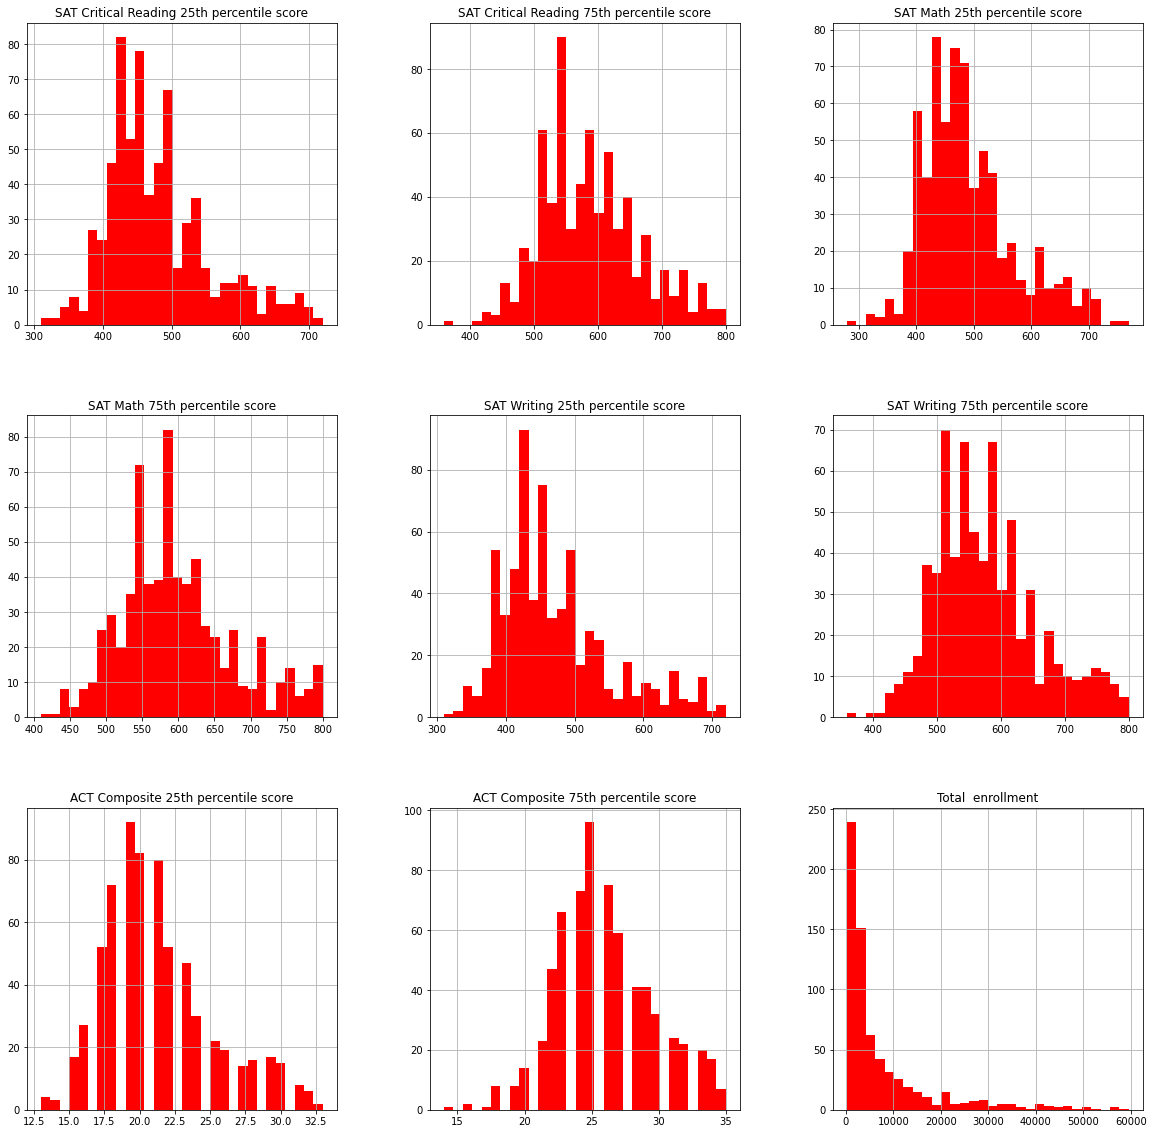

In [10]:
scores.hist(bins = 30, figsize = (20, 20), color = 'r')

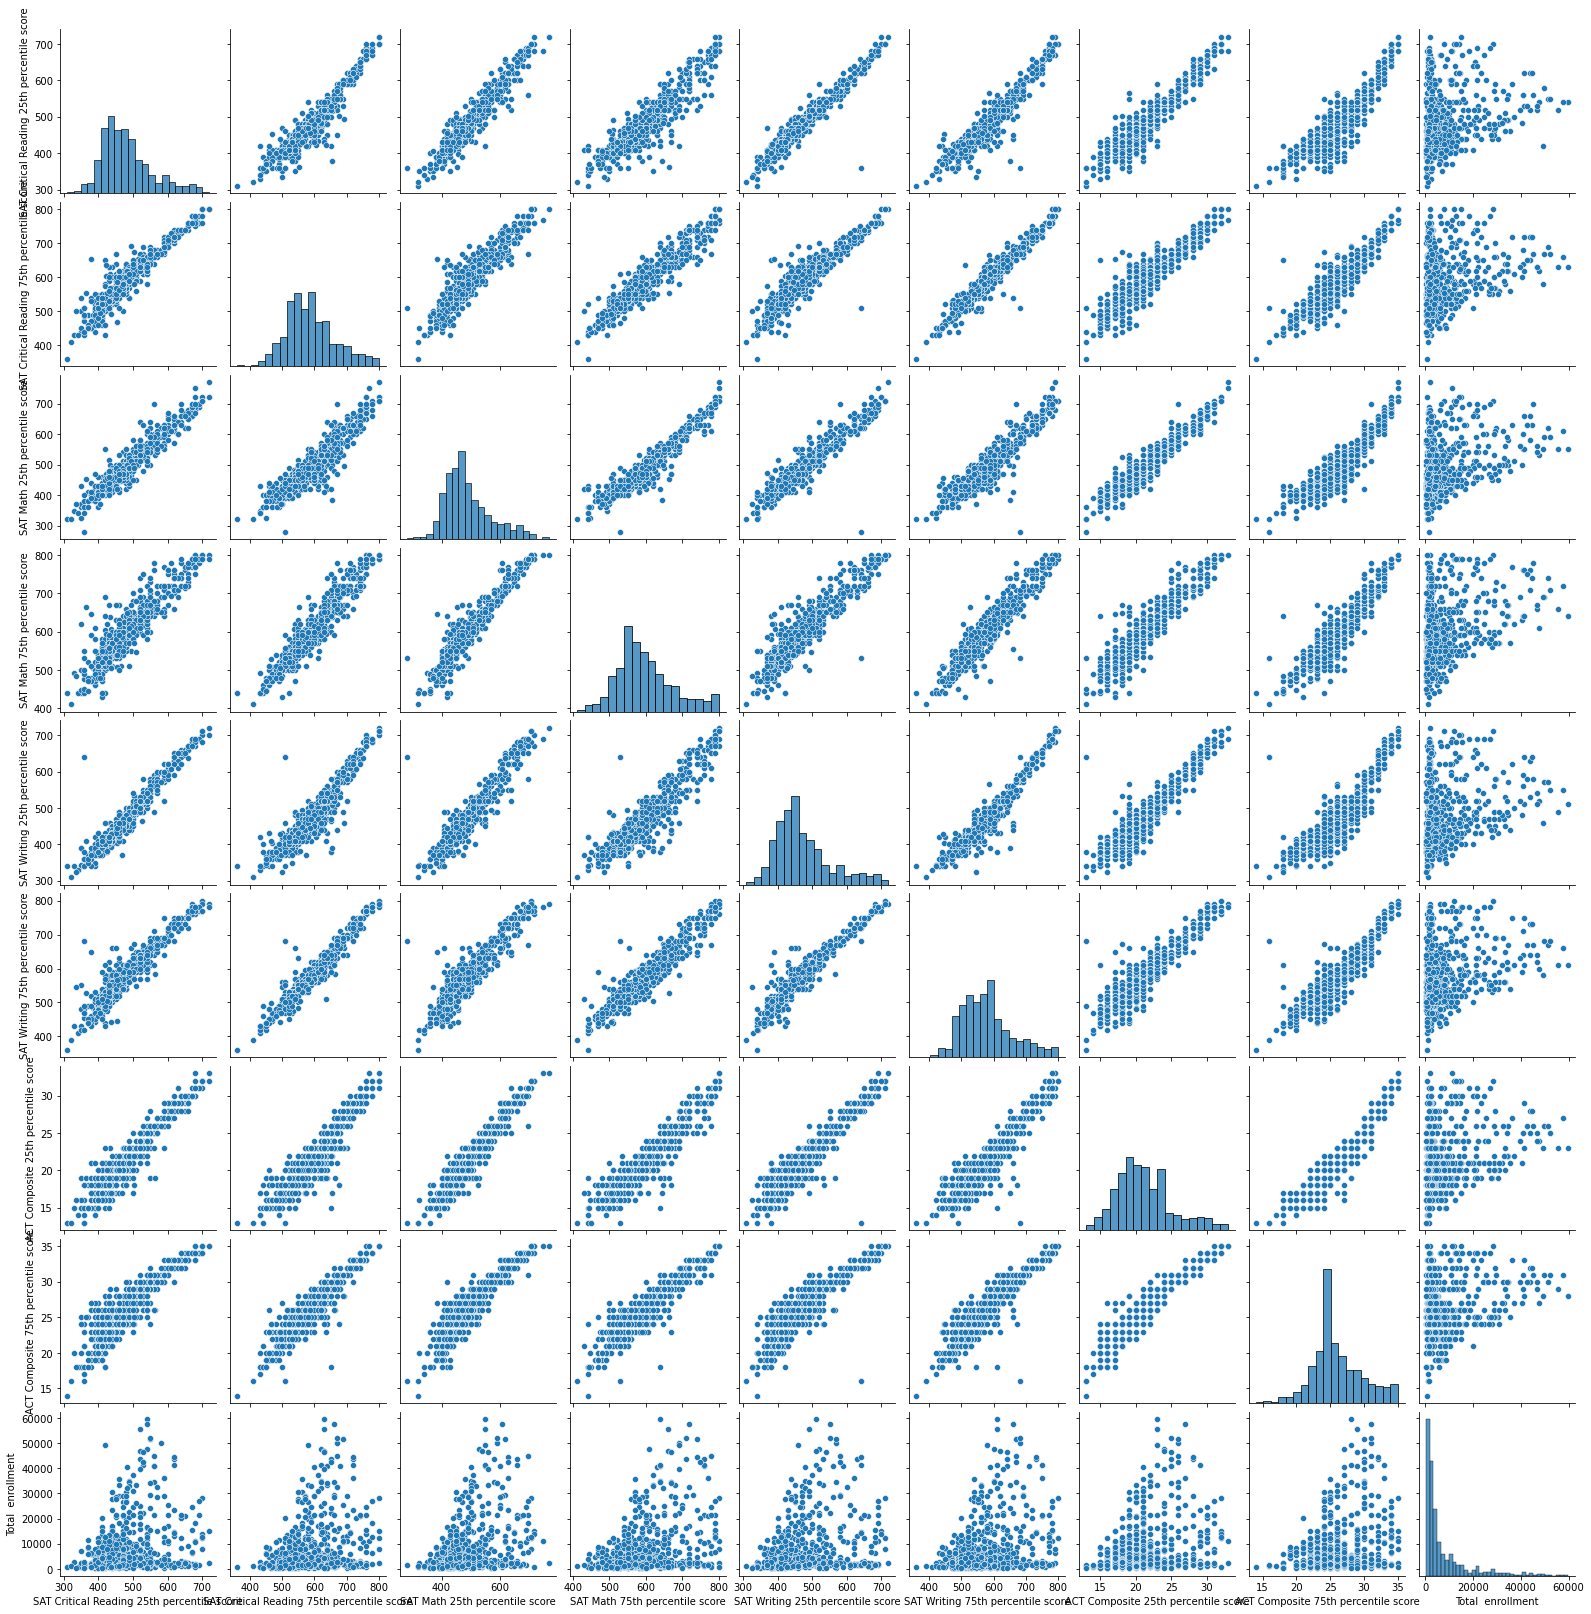

In [12]:
sns.pairplot(scores)

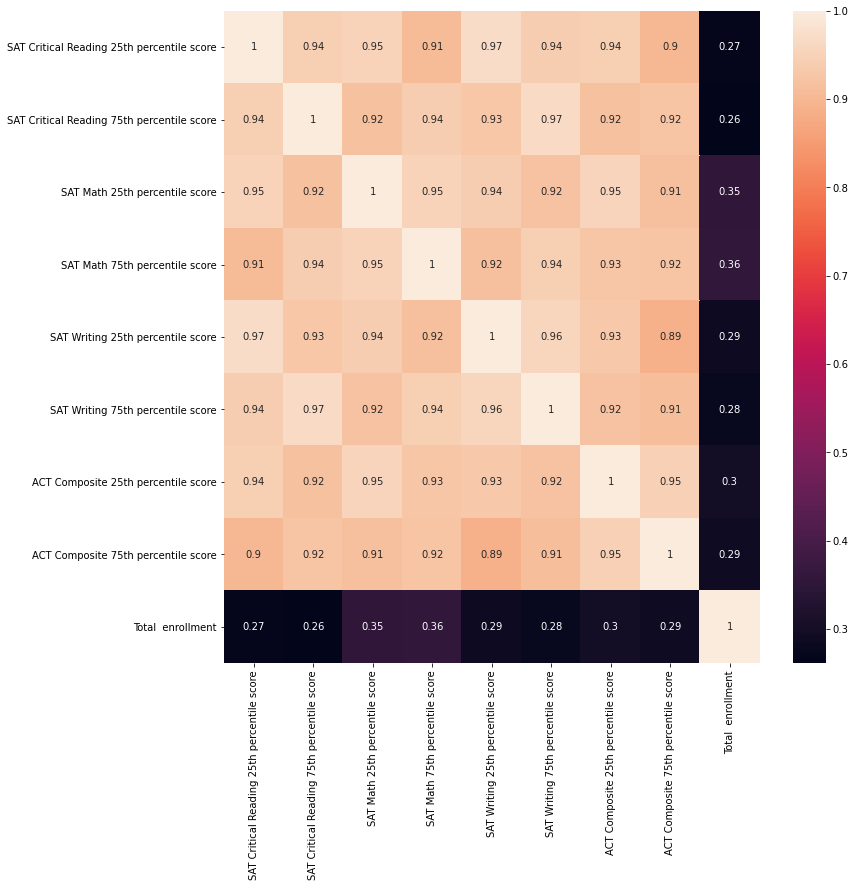

In [13]:
corr_matrix = scores.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

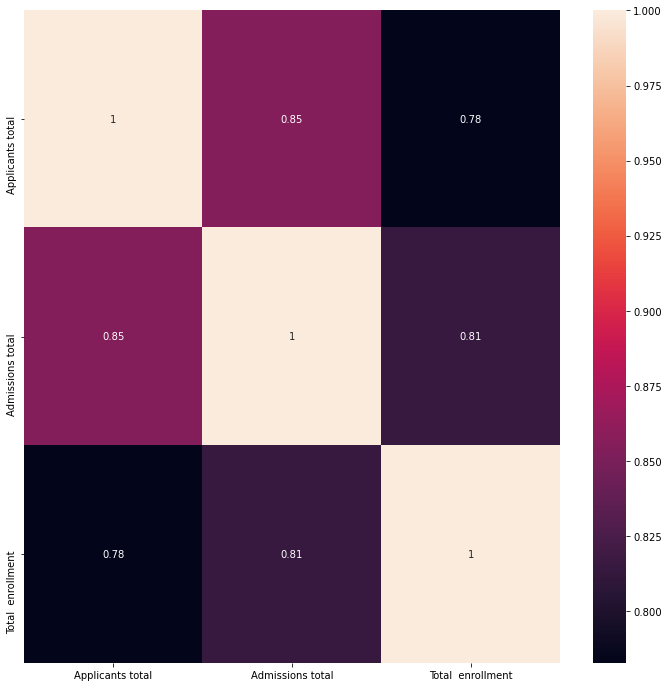

In [14]:
corr_matrix = admit.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Task #5: Create Training and Testing Datasets

# Separating The Data
Now that the dataset has been trimmed,we need to separate it into 4 arrays. However, before we can do that we need to define what attribute we are trying to predict. This attribute is known as a label. The other attributes that will determine our label are known as features. Once we've done this we will use numpy to create two arrays. One that contains all of our features and one that contains our labels.

In [15]:
X = np.array(scores.drop(["Total  enrollment"], 1)) # Features
y = np.array(scores["Total  enrollment"].values.reshape(-1, 1)) # Labels
X[0]


array([490., 620., 500., 640., 480., 600.,  22.,  30.])

In [16]:

X.shape

(677, 8)

In [17]:
y.shape

(677, 1)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_x.fit_transform(y)

AttributeError: 'numpy.ndarray' object has no attribute 'range'

In [19]:
# Split the data into training and testing

### BEGIN SOLUTION

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
### END SOLUTION

# Task #6: Train and Evaluate a Linear Regression Model (Implementing the Algorithm)
Now that we understand how linear regression works we can use it to make predictions

We will start by defining the model which we will be using.

In [20]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
### END SOLUTION

In [21]:
#Next we will train and score our model using the arrays we created in the previous tutorial.

### BEGIN SOLUTION
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
acc = LinearRegressionModel.score(X_test, y_test) # acc stands for accuracy 
### END SOLUTION

In [22]:
#To see how well our algorithm performed on our test data we can print out the accuracy.

print(acc)

0.20641640234147396


# Viewing The Constants
If we want to see the constants used to generate the line we can type the following.

In [23]:
print('Coefficient: \n', LinearRegressionModel.coef_) # These are each slope value
print('Intercept: \n', LinearRegressionModel.intercept_) # This is the intercept

Coefficient: 
 [[-0.43059863 -0.35271717  0.6025075   0.63795649  0.29197508 -0.21932685
  -0.21074765  0.01793868]]
Intercept: 
 [-0.00564171]


# Task #7:Train and Evaluate an Artifical Neural Network

In [24]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout

In [25]:
ANN = keras.Sequential()
ANN.add(Dense(50, input_dim = 8))
ANN.add(Activation('relu'))

ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(150))
ANN.add(Activation('linear'))
ANN.add(Dropout(1))

ANN.compile(loss = 'mse', optimizer = 'adam')
ANN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [26]:
ANN.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [27]:
X_train[0]

array([-0.41174226, -0.50227265, -0.38317564, -0.48361848, -0.52275449,
       -0.46965526, -0.54013059, -0.53840409])

In [28]:
y_train

array([[-6.45184506e-01],
       [ 5.76802560e-01],
       [-5.32517650e-01],
       [ 2.64301135e+00],
       [ 2.21258708e-01],
       [-6.30662567e-01],
       [ 4.27879587e-01],
       [-8.82827597e-02],
       [-3.87590646e-01],
       [ 3.60272635e+00],
       [-5.56298543e-01],
       [ 2.51637983e-02],
       [-5.52692424e-01],
       [-6.50544954e-01],
       [ 1.25426564e+00],
       [-3.82327662e-01],
       [ 4.96005999e-01],
       [-5.75108840e-01],
       [ 8.26209555e-01],
       [-5.33394814e-01],
       [ 2.41485122e+00],
       [-6.05712121e-01],
       [ 3.24308906e+00],
       [ 2.23305424e-01],
       [-6.27251373e-01],
       [-6.11754807e-01],
       [-5.80566750e-01],
       [-1.79702752e-01],
       [-5.31445560e-01],
       [-5.54349290e-01],
       [-7.15650023e-01],
       [ 1.01477076e-01],
       [-5.08346905e-01],
       [-5.88558690e-01],
       [-4.48992134e-01],
       [-6.31052418e-01],
       [-2.78919759e-01],
       [-4.54547507e-01],
       [-2.9

In [29]:
epochs_hist = ANN.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100


ValueError: in user code:

    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:230 call
        output = control_flow_util.smart_cond(training, dropped_inputs,
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:114 smart_cond
        return smart_module.smart_cond(
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:224 dropped_inputs
        return nn.dropout(
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:538 new_func
        return func(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:5059 dropout
        return dropout_v2(x, rate, noise_shape=noise_shape, seed=seed, name=name)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:5139 dropout_v2
        raise ValueError("rate must be a scalar tensor or a float in the "

    ValueError: rate must be a scalar tensor or a float in the range [0, 1), got 1


In [ ]:
result = ANN.evaluate(X_train, y_train, epochs = 100, batch_size = 20)
accuracy_ANN = 1 - result

In [ ]:
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss Progress During Training")
plt.xlable('Epoch')
plt.ylabel("Training Loss")
plt.legend(['Training Loss'])